In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#permite mostrar varios graficos en un notebook
%matplotlib inline
import seaborn as sb
#preprocessing para llenar los datos vacios
from sklearn.impute import SimpleImputer

In [2]:
movies = pd.read_csv('peliculas.csv', encoding='utf-8')
movies.shape

(5043, 19)

In [3]:
movies.loc[1, :]

movie_title                          Pirates of the Caribbean: At World's End 
title_year                                                                2007
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   169
language                                                               English
country                                                                    USA
duration.1                                                                 169
genres                                                Action|Adventure|Fantasy
content_rating                                                           PG-13
plot_keywords                goddess|marriage ceremony|marriage proposal|pi...
director_name                                                   Gore Verbinski
actor_1_name                                        

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
color                        5024 non-null object
aspect_ratio                 4714 non-null float64
duration                     5028 non-null float64
language                     5031 non-null object
country                      5038 non-null object
duration.1                   5028 non-null float64
genres                       5043 non-null object
content_rating               4740 non-null object
plot_keywords                4890 non-null object
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
cast_total_facebook_likes    5043 non-null int64
budget                       4551 non-null float64
imdb_score                   5043 non-n

In [5]:
movies.dtypes

movie_title                   object
title_year                   float64
color                         object
aspect_ratio                 float64
duration                     float64
language                      object
country                       object
duration.1                   float64
genres                        object
content_rating                object
plot_keywords                 object
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
cast_total_facebook_likes      int64
budget                       float64
imdb_score                   float64
gross                        float64
dtype: object

In [6]:
(movies.dtypes == float) | (movies.dtypes == int)

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [7]:
num = (movies.dtypes == float) | (movies.dtypes == int)
num['cast_total_facebook_likes'] = True
num_cols = [c for c in num.index if num[c]]
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [8]:
obj = (movies.dtypes == object)
obj_cols = [c for c in obj.index if obj[c]]
obj_cols

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [9]:
movies_num = movies[num_cols]
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


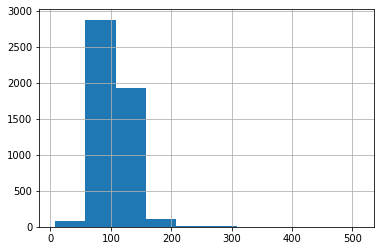

In [10]:
movies_num['duration'].hist()

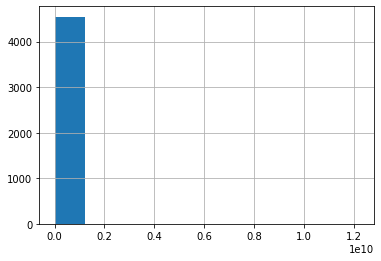

In [11]:
movies_num['budget'].hist()

In [12]:
mask = (movies_num['budget'] > 1e9)
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [13]:
financials = pd.read_csv('thenumbers.csv')
financials = financials[['movie_title', 'production_budget', 'worldwide_gross']]

In [14]:
print(f'finincials shape: {financials.shape}')
print(f'movies shape: {movies.shape}')

finincials shape: (4341, 3)
movies shape: (5043, 19)


In [15]:
movies_num = pd.concat([movies_num, movies['movie_title']], axis=1)

In [16]:
movies_v2 = pd.merge(financials, movies_num, on='movie_title', how='left')
movies_v2.shape

(4385, 11)

In [17]:
#mostrar valores nulos y no nulos, despues aplicarles una funcion y contar los valores
movies_v2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [18]:
#mostrar valores 0 y aplicarles la funcion de contar
(movies_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [19]:
available = ((movies_v2 != 0) & (movies_v2.notnull()))
available.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

In [20]:
mask = available['worldwide_gross']
movies_v2 = movies_v2[mask]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [21]:
movies_v2 = movies_v2.drop('movie_title', axis=1)
movies_v2 = movies_v2.drop('duration', axis=1)
movies_v2.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0


In [22]:
values = imputer.fit_transform(movies_v2)
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        4.04553863e+07, 7.10000000e+00, 4.83193329e+07],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 4.83193329e+07],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        4.04553863e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [23]:
x = pd.DataFrame(values)
x.columns = movies_v2.columns
x.index = movies_v2.index
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [24]:
x.to_csv('x.csv', index=False)